In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diabetic_data.csv')
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df = data

In [4]:
df.shape

(101766, 50)

In [ ]:
df.describe(include='all').T

In [ ]:
df.corr()

In [ ]:
# heatmap
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",vmin=-1,vmax=1,annot=True)
plt.show()

In [5]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
# mapping various ids for 3 id features

In [8]:
id_map = pd.read_csv('IDs_mapping.csv')
id_map.shape

(67, 2)

In [9]:
id_map.head(20)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [10]:
id_map.iloc[20:41]
# we will have to remove records/patients with ids (11,13,14,19,20,21) as they are expired or on the death bed as hospice

,admission_type_id,description
20,11,Expired
21,12,Still patient or expected to return for outpat...
22,13,Hospice / home
23,14,Hospice / medical facility
24,15,Discharged/transferred within this institution...
25,16,Discharged/transferred/referred another instit...
26,17,Discharged/transferred/referred to this instit...
27,18,NaN
28,19,"Expired at home. Medicaid only, hospice."
29,20,"Expired in a medical facility. Medicaid only, ..."


In [11]:
id_map.iloc[41:61]

,admission_type_id,description
41,admission_source_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available


In [12]:
id_map.tail(7)

,admission_type_id,description
60,20,Not Mapped
61,21,Unknown/Invalid
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center
66,26,Transfer from Hospice


In [13]:
df = data.copy()

# Replacing '?' with nan values

In [14]:
df1 = pd.concat((df.diag_1,df.diag_2),axis=1)
df1 = pd.concat((df1,df.diag_3),axis=1)
df.drop(['diag_1','diag_2','diag_3'],axis=1,inplace=True)
df.replace('?',np.nan, inplace=True)
df = pd.concat((df,df1),axis=1)
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,NaN,NaN,NaN,NaN,NaN
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [15]:
# through id_map we can see some ids are given as NaN
df['admission_type_id'].replace(6,np.nan, inplace=True)
df['discharge_disposition_id'].replace(18,np.nan, inplace=True)
df['admission_source_id'].replace(17,np.nan, inplace=True)

df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id            5291
discharge_disposition_id     3691
admission_source_id          6781
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

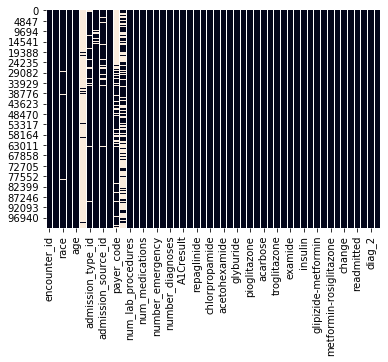

In [16]:
sns.heatmap(df.isnull(), cbar = False)
plt.show()

In [17]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'diag_1', 'diag_2', 'diag_3'],
      dtype='object')

In [18]:
df.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [19]:
df.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [20]:
df.weight.value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [21]:
df.weight.isnull().sum()

98569

In [22]:
df.admission_type_id.value_counts()

1.0    53990
3.0    18869
2.0    18480
5.0     4785
8.0      320
7.0       21
4.0       10
Name: admission_type_id, dtype: int64

In [23]:
df.discharge_disposition_id.value_counts()

1.0     60234
3.0     13954
6.0     12902
2.0      2128
22.0     1993
11.0     1642
5.0      1184
25.0      989
4.0       815
7.0       623
23.0      412
13.0      399
14.0      372
28.0      139
8.0       108
15.0       63
24.0       48
9.0        21
17.0       14
16.0       11
19.0        8
10.0        6
27.0        5
12.0        3
20.0        2
Name: discharge_disposition_id, dtype: int64

In [24]:
df.discharge_disposition_id.value_counts().size

25

In [25]:
df.admission_source_id.value_counts()

7.0     57494
1.0     29565
4.0      3187
6.0      2264
2.0      1104
5.0       855
3.0       187
20.0      161
9.0       125
8.0        16
22.0       12
10.0        8
11.0        2
14.0        2
25.0        2
13.0        1
Name: admission_source_id, dtype: int64

In [26]:
df.admission_source_id.value_counts().size

16

In [27]:
df.time_in_hospital.value_counts()

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64

In [28]:
df.time_in_hospital.value_counts().size

14

In [29]:
df.payer_code.value_counts()

MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [30]:
df.payer_code.value_counts().size

17

In [31]:
df.medical_specialty.value_counts().head(10)

InternalMedicine              14635
Emergency/Trauma               7565
Family/GeneralPractice         7440
Cardiology                     5352
Surgery-General                3099
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Radiologist                    1140
Pulmonology                     871
Name: medical_specialty, dtype: int64

In [32]:
df.medical_specialty.value_counts().size

72

In [33]:
df.num_lab_procedures.value_counts().head(10)

1     3208
43    2804
44    2496
45    2376
38    2213
40    2201
46    2189
41    2117
42    2113
47    2106
Name: num_lab_procedures, dtype: int64

In [34]:
df.num_lab_procedures.value_counts().size

118

In [35]:
df.num_procedures.value_counts()

0    46652
1    20742
2    12717
3     9443
6     4954
4     4180
5     3078
Name: num_procedures, dtype: int64

In [36]:
df.num_medications.value_counts().head(10)

13    6086
12    6004
11    5795
15    5792
14    5707
16    5430
10    5346
17    4919
9     4913
18    4523
Name: num_medications, dtype: int64

In [37]:
df.num_medications.value_counts().size

75

In [38]:
df.number_outpatient.value_counts()

0     85027
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
22        5
18        5
19        3
24        3
27        3
23        2
25        2
26        2
29        2
33        2
35        2
36        2
40        1
28        1
34        1
37        1
38        1
39        1
42        1
Name: number_outpatient, dtype: int64

In [39]:
df.number_outpatient.value_counts().size

39

In [40]:
df.number_emergency.value_counts()

0     90383
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
18        5
16        5
19        4
20        4
14        3
15        3
21        2
25        2
76        1
54        1
24        1
28        1
29        1
37        1
42        1
46        1
64        1
63        1
Name: number_emergency, dtype: int64

In [41]:
df.number_emergency.value_counts().size

33

In [42]:
df.number_inpatient.value_counts()

0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
18        1
21        1
Name: number_inpatient, dtype: int64

In [43]:
df.number_inpatient.value_counts().size

21

In [44]:
df.diag_1.value_counts()

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
10        1
216       1
160       1
832       1
V07       1
Name: diag_1, Length: 717, dtype: int64

In [45]:
df.diag_1.value_counts().size

717

In [46]:
df.diag_1.isnull().sum()

0

In [47]:
df.diag_2.value_counts()

276     6752
428     6662
250     6071
427     5036
401     3736
        ... 
E850       1
5          1
968        1
E817       1
V25        1
Name: diag_2, Length: 749, dtype: int64

In [48]:
df.diag_2.value_counts().size

749

In [49]:
df.diag_2.isnull().sum()

0

In [50]:
df.diag_3.value_counts()

250     11555
401      8289
276      5175
428      4577
427      3955
        ...  
370         1
671         1
853         1
657         1
E865        1
Name: diag_3, Length: 790, dtype: int64

In [51]:
df.diag_3.value_counts().size

790

In [52]:
df.diag_3.isnull().sum()

0

In [53]:
df.number_diagnoses.value_counts()

9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64

In [54]:
df.number_diagnoses.value_counts().size

16

In [55]:
df.max_glu_serum.value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [56]:
df.A1Cresult.value_counts()       

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [57]:
df.metformin.value_counts()

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

In [58]:
df.repaglinide.value_counts()

No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64

In [59]:
df.nateglinide.value_counts()

No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64

In [60]:
df.chlorpropamide.value_counts()       

No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64

In [61]:
df.glimepiride.value_counts()

No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64

In [62]:
df.acetohexamide.value_counts()

No        101765
Steady         1
Name: acetohexamide, dtype: int64

In [63]:
df.glipizide.value_counts()

No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64

In [64]:
df.glyburide.value_counts()

No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64

In [65]:
df.tolbutamide.value_counts()      

No        101743
Steady        23
Name: tolbutamide, dtype: int64

In [66]:
df.pioglitazone.value_counts()

No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64

In [67]:
df.rosiglitazone.value_counts()

No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64

In [68]:
df.acarbose.value_counts()

No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64

In [69]:
df.miglitol.value_counts()

No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64

In [70]:
df.troglitazone.value_counts()

No        101763
Steady         3
Name: troglitazone, dtype: int64

In [71]:
df.tolazamide.value_counts()

No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64

In [72]:
df.examide.value_counts()
# have zero counts

No    101766
Name: examide, dtype: int64

In [73]:
df.citoglipton.value_counts()
# have zero counts

No    101766
Name: citoglipton, dtype: int64

In [74]:
df.insulin.value_counts()

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

In [75]:
df['glyburide-metformin'].value_counts()

No        101060
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64

In [76]:
df['glipizide-metformin'].value_counts()

No        101753
Steady        13
Name: glipizide-metformin, dtype: int64

In [77]:
df['glimepiride-pioglitazone'].value_counts()

No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64

In [78]:
df['metformin-rosiglitazone'].value_counts()       

No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64

In [79]:
df['metformin-pioglitazone'].value_counts()

No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64

In [80]:
df.change.value_counts()

No    54755
Ch    47011
Name: change, dtype: int64

In [81]:
df.diabetesMed.value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [82]:
df.readmitted.value_counts()
# classes are imbalanced

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [83]:
# df.apply(pd.DataFrame.value_counts)

In [84]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(71518, 50)

# Data Cleaning

### From the above tables we are able to make the following conclusions
1. encounter_id and patient_nbr are not useful as they are just identities
2. Missing values
    a. race has about 2k missing values payer_code and medical_specialty have about 50k missing values
    b. weight feature has more than 90% NaN values so we have to drop it.
    c. other missing values diag_1 - 21, diag_2 - 358 & diag_3 - 1423
    d. admission_type_id - 5291 ,discharge_disposition_id - 3691 & admission_source_id - 6781

3. All columns like (diag_1,diag_2,diag_2,admission_type_id,discharge_disposition_id,admission_source_id) are actually categorical but identified as numeric we will have to convert them to categorical
4. We will have to remove records/patients with ids (11,13,14,19,20,21) as they are expired or on the death bed.
5. Medical_speciality has 72 distinct values so we should consider trimming it.
6. examide and citoglipton features have no values so we will drop these columns.

In [85]:
#first removing non important features

In [86]:
df = df.drop(['encounter_id','patient_nbr','weight','payer_code','examide','citoglipton'],axis=1)

In [87]:
df.shape

(101766, 44)

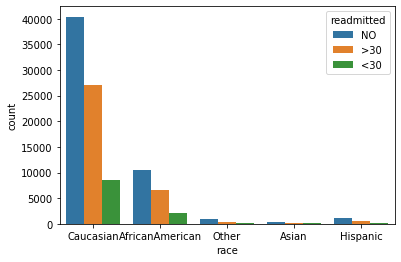

In [88]:
sns.countplot(df.race,hue=df.readmitted)

In [89]:
df['race'].fillna((df["race"].mode()[0]),inplace=True)
# instead of of filling missing values we should mark it 'unknown' for all other features
df['medical_specialty'].fillna('Unknown',inplace=True)
# 
df['admission_type_id'].fillna('Unknown',inplace=True)
df['discharge_disposition_id'].fillna('Unknown',inplace=True)
df['admission_source_id'].fillna('Unknown',inplace=True)

In [90]:
# grouping diagnosis

In [91]:
# Creating additional columns for grouped diagnosis
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

In [92]:
# separating levels of diagnosis to group them properly
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [93]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [94]:
for index, row in df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df.loc[index, 'level1_diag1'] = 8
    else:
        df.loc[index, 'level1_diag1'] = 0
        
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        df.loc[index, 'level1_diag2'] = 8
    else:
        df.loc[index, 'level1_diag2'] = 0
    
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        df.loc[index, 'level1_diag3'] = 8
    else:
        df.loc[index, 'level1_diag3'] = 0

In [95]:
for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0
        
    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0
        
        
    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

In [96]:
df.drop(['diag_1','diag_2','diag_3'],axis=1,inplace=True)
# df.drop(['level2_diag1','level1_diag2','level2_diag2','level1_diag3','level2_diag3'])

In [97]:
# for medical_specialty we make a new category 'other' to reduce model complexity
# for all distinct values having count less than 100
# dft.medical_specialty.value_counts().tail(44)
# dft.medical_specialty.value_counts().head(28)

to_keep = ['InternalMedicine',               
'Emergency/Trauma',                      
'Family/GeneralPractice',                
'Cardiology',                            
'Surgery-General',                       
'Nephrology',                            
'Orthopedics',                           
'Orthopedics-Reconstructive',            
'Radiologist',                           
'Pulmonology',                           
'Psychiatry',                            
'Urology',                               
'ObstetricsandGynecology',               
'Surgery-Cardiovascular/Thoracic',       
'Gastroenterology',                      
'Surgery-Vascular',                      
'Surgery-Neuro',                         
'PhysicalMedicineandRehabilitation',     
'Oncology',                              
'Pediatrics',                            
'Hematology/Oncology',                   
'Neurology',
'Pediatrics-Endocrinology',
'Otolaryngology',                      
'Endocrinology',                       
'Surgery-Thoracic',
'Psychology',
'Podiatry']

# making a to replace values copy
df['med_spec'] = df['medical_specialty'].copy()

# replacing values with 'other'
df.loc[~df.med_spec.isin(to_keep),'med_spec'] = 'Other'

In [98]:
df.drop('medical_specialty',axis=1,inplace=True)
df.med_spec.value_counts()

Other                                50874
InternalMedicine                     14635
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology                              203
Pediatrics-

In [99]:
df.shape

(101766, 47)

In [100]:
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide-metformin         0
glipizide-

In [101]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'level1_diag1', 'level2_diag1', 'level1_diag2', 'level2_diag2',
       'level1_diag3', 'level2_diag3', 'med_spec'],
      dtype='object')

In [102]:
# treating categorical values marked as numeric values
df['admission_type_id'] = df['admission_type_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_source_id'] = df['admission_source_id'].astype(str)
df['level1_diag1'] = df['level1_diag1'].astype(str)
df['level2_diag1'] = df['level2_diag1'].astype(str)
df['level1_diag2'] = df['level1_diag2'].astype(str)
df['level2_diag2'] = df['level2_diag2'].astype(str)
df['level1_diag3'] = df['level1_diag3'].astype(str)
df['level2_diag3'] = df['level2_diag3'].astype(str)

In [103]:
df.dtypes

race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol            

In [104]:
# treating the target variable

In [105]:
#df['readmitted'] = df['readmitted'].replace('>30', 1)
#df['readmitted'] = df['readmitted'].replace('<30', 1)
#df['readmitted'] = df['readmitted'].replace('NO', 0)

In [106]:
# df.head().T

,0,1,2,3,4
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
admission_type_id,Unknown,1.0,1.0,1.0,1.0
discharge_disposition_id,25.0,1.0,1.0,1.0,1.0
admission_source_id,1.0,7.0,7.0,7.0,7.0
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8


In [119]:
#df.readmitted.value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

In [107]:
#df.to_csv('clean_diabetic_data_1.csv')

In [108]:
df['readmitted'] = data['readmitted']
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

In [109]:
df.head().T

,0,1,2,3,4
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
admission_type_id,Unknown,1.0,1.0,1.0,1.0
discharge_disposition_id,25.0,1.0,1.0,1.0,1.0
admission_source_id,1.0,7.0,7.0,7.0,7.0
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8


In [120]:
df.readmitted.value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

In [110]:
#df.to_csv('clean_diabetic_data_2.csv')

In [111]:
data1 = pd.read_csv('clean_diabetic_data_1.csv')
data1.readmitted.value_counts()

0    54864
1    46902
Name: readmitted, dtype: int64

In [112]:
data2 = pd.read_csv('clean_diabetic_data_2.csv')
data2.readmitted.value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

# Visualisation

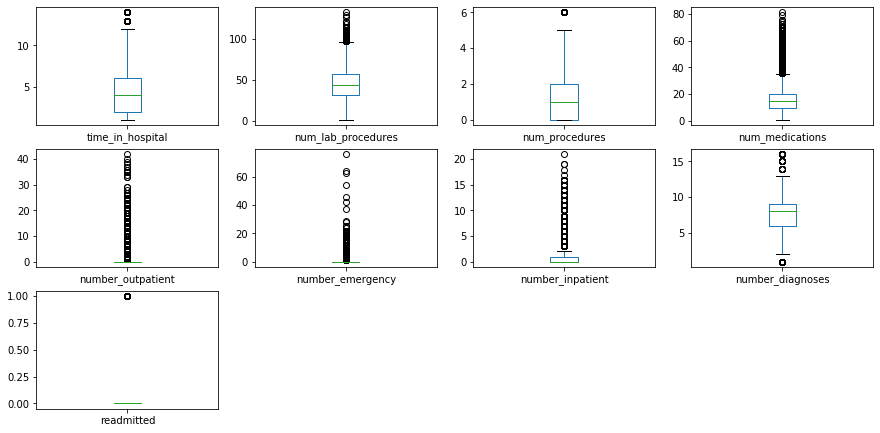

In [113]:
data1.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=10, figsize = (15, 10))
plt.show()

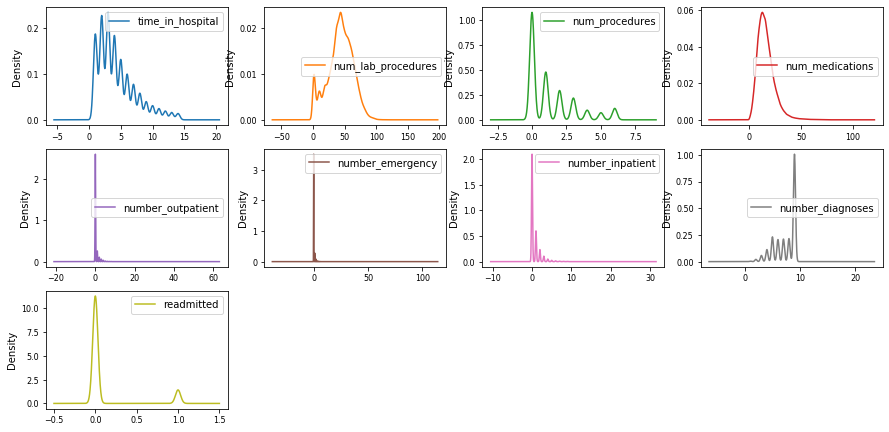

In [114]:
data1.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8, figsize = (15, 10))
plt.show()

In [ ]:
data2.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=10, figsize = (15, 10))
plt.show()

In [ ]:
data2.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8, figsize = (15, 10))
plt.show()

##### by looking at the values from individual distinct value counts and the above graphs we can say most of the features are highly skewed

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

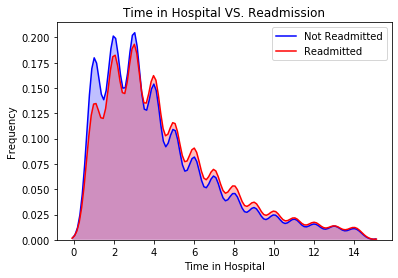

In [115]:
ax=sns.kdeplot(data1.loc[(data1['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(data1.loc[(data1['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

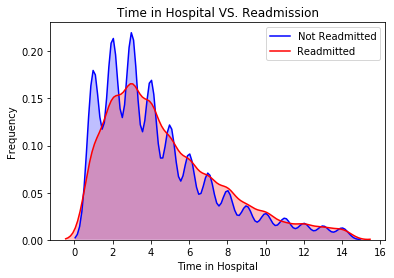

In [116]:
ax=sns.kdeplot(data2.loc[(data2['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(data2.loc[(data2['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

In [ ]:
# we choose the second data to go ahead for modeling as we need to check frequent readmissions

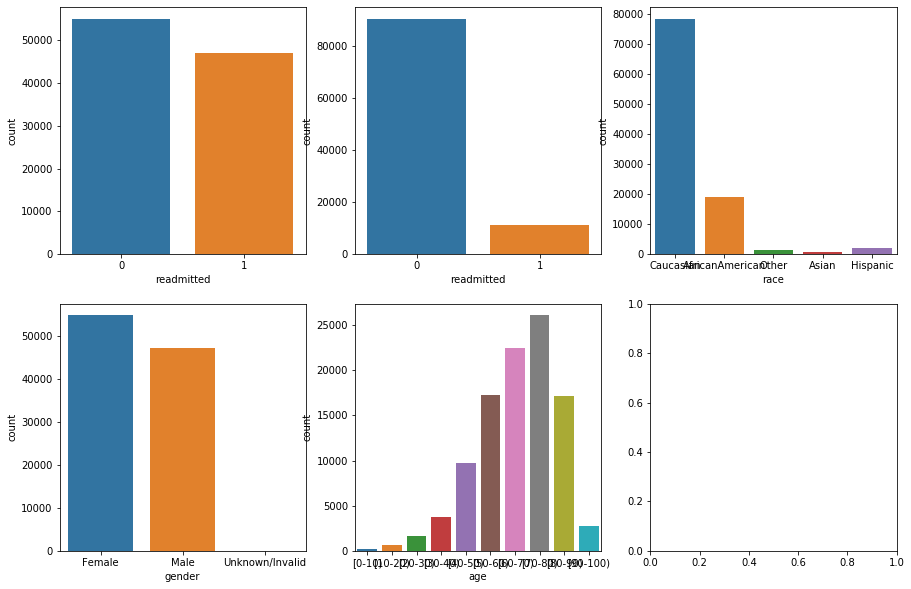

In [117]:
fig, ax = plt.subplots(figsize=(15,10), ncols=3, nrows=2)

sns.countplot(x="readmitted", data=data1, ax=ax[0][0])
sns.countplot(x="readmitted", data=data2, ax=ax[0][1])
sns.countplot(x="race", data=df, ax=ax[0][2])
sns.countplot(x="gender", data=df, ax=ax[1][0])
sns.countplot(x="age", data=df, ax=ax[1][1])
plt.show()

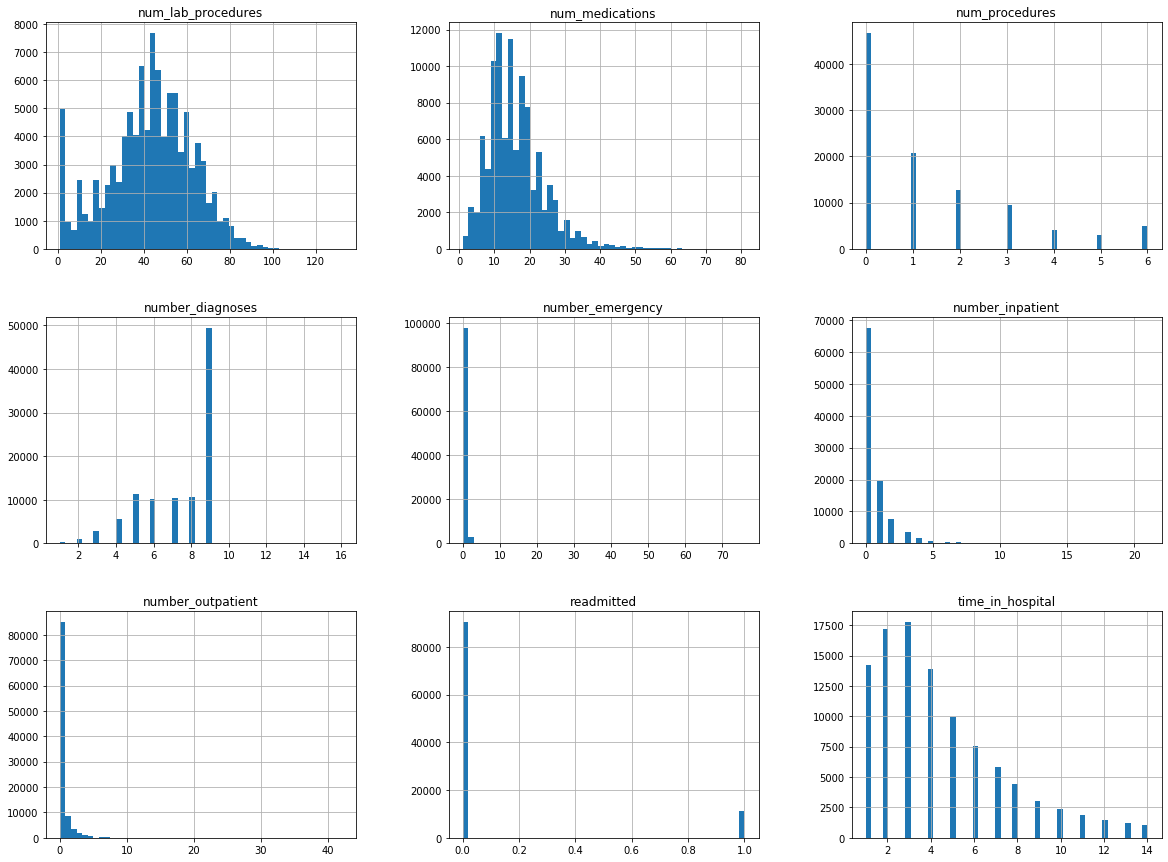

In [118]:
df.hist(bins=50, figsize=(20,15))
plt.show()

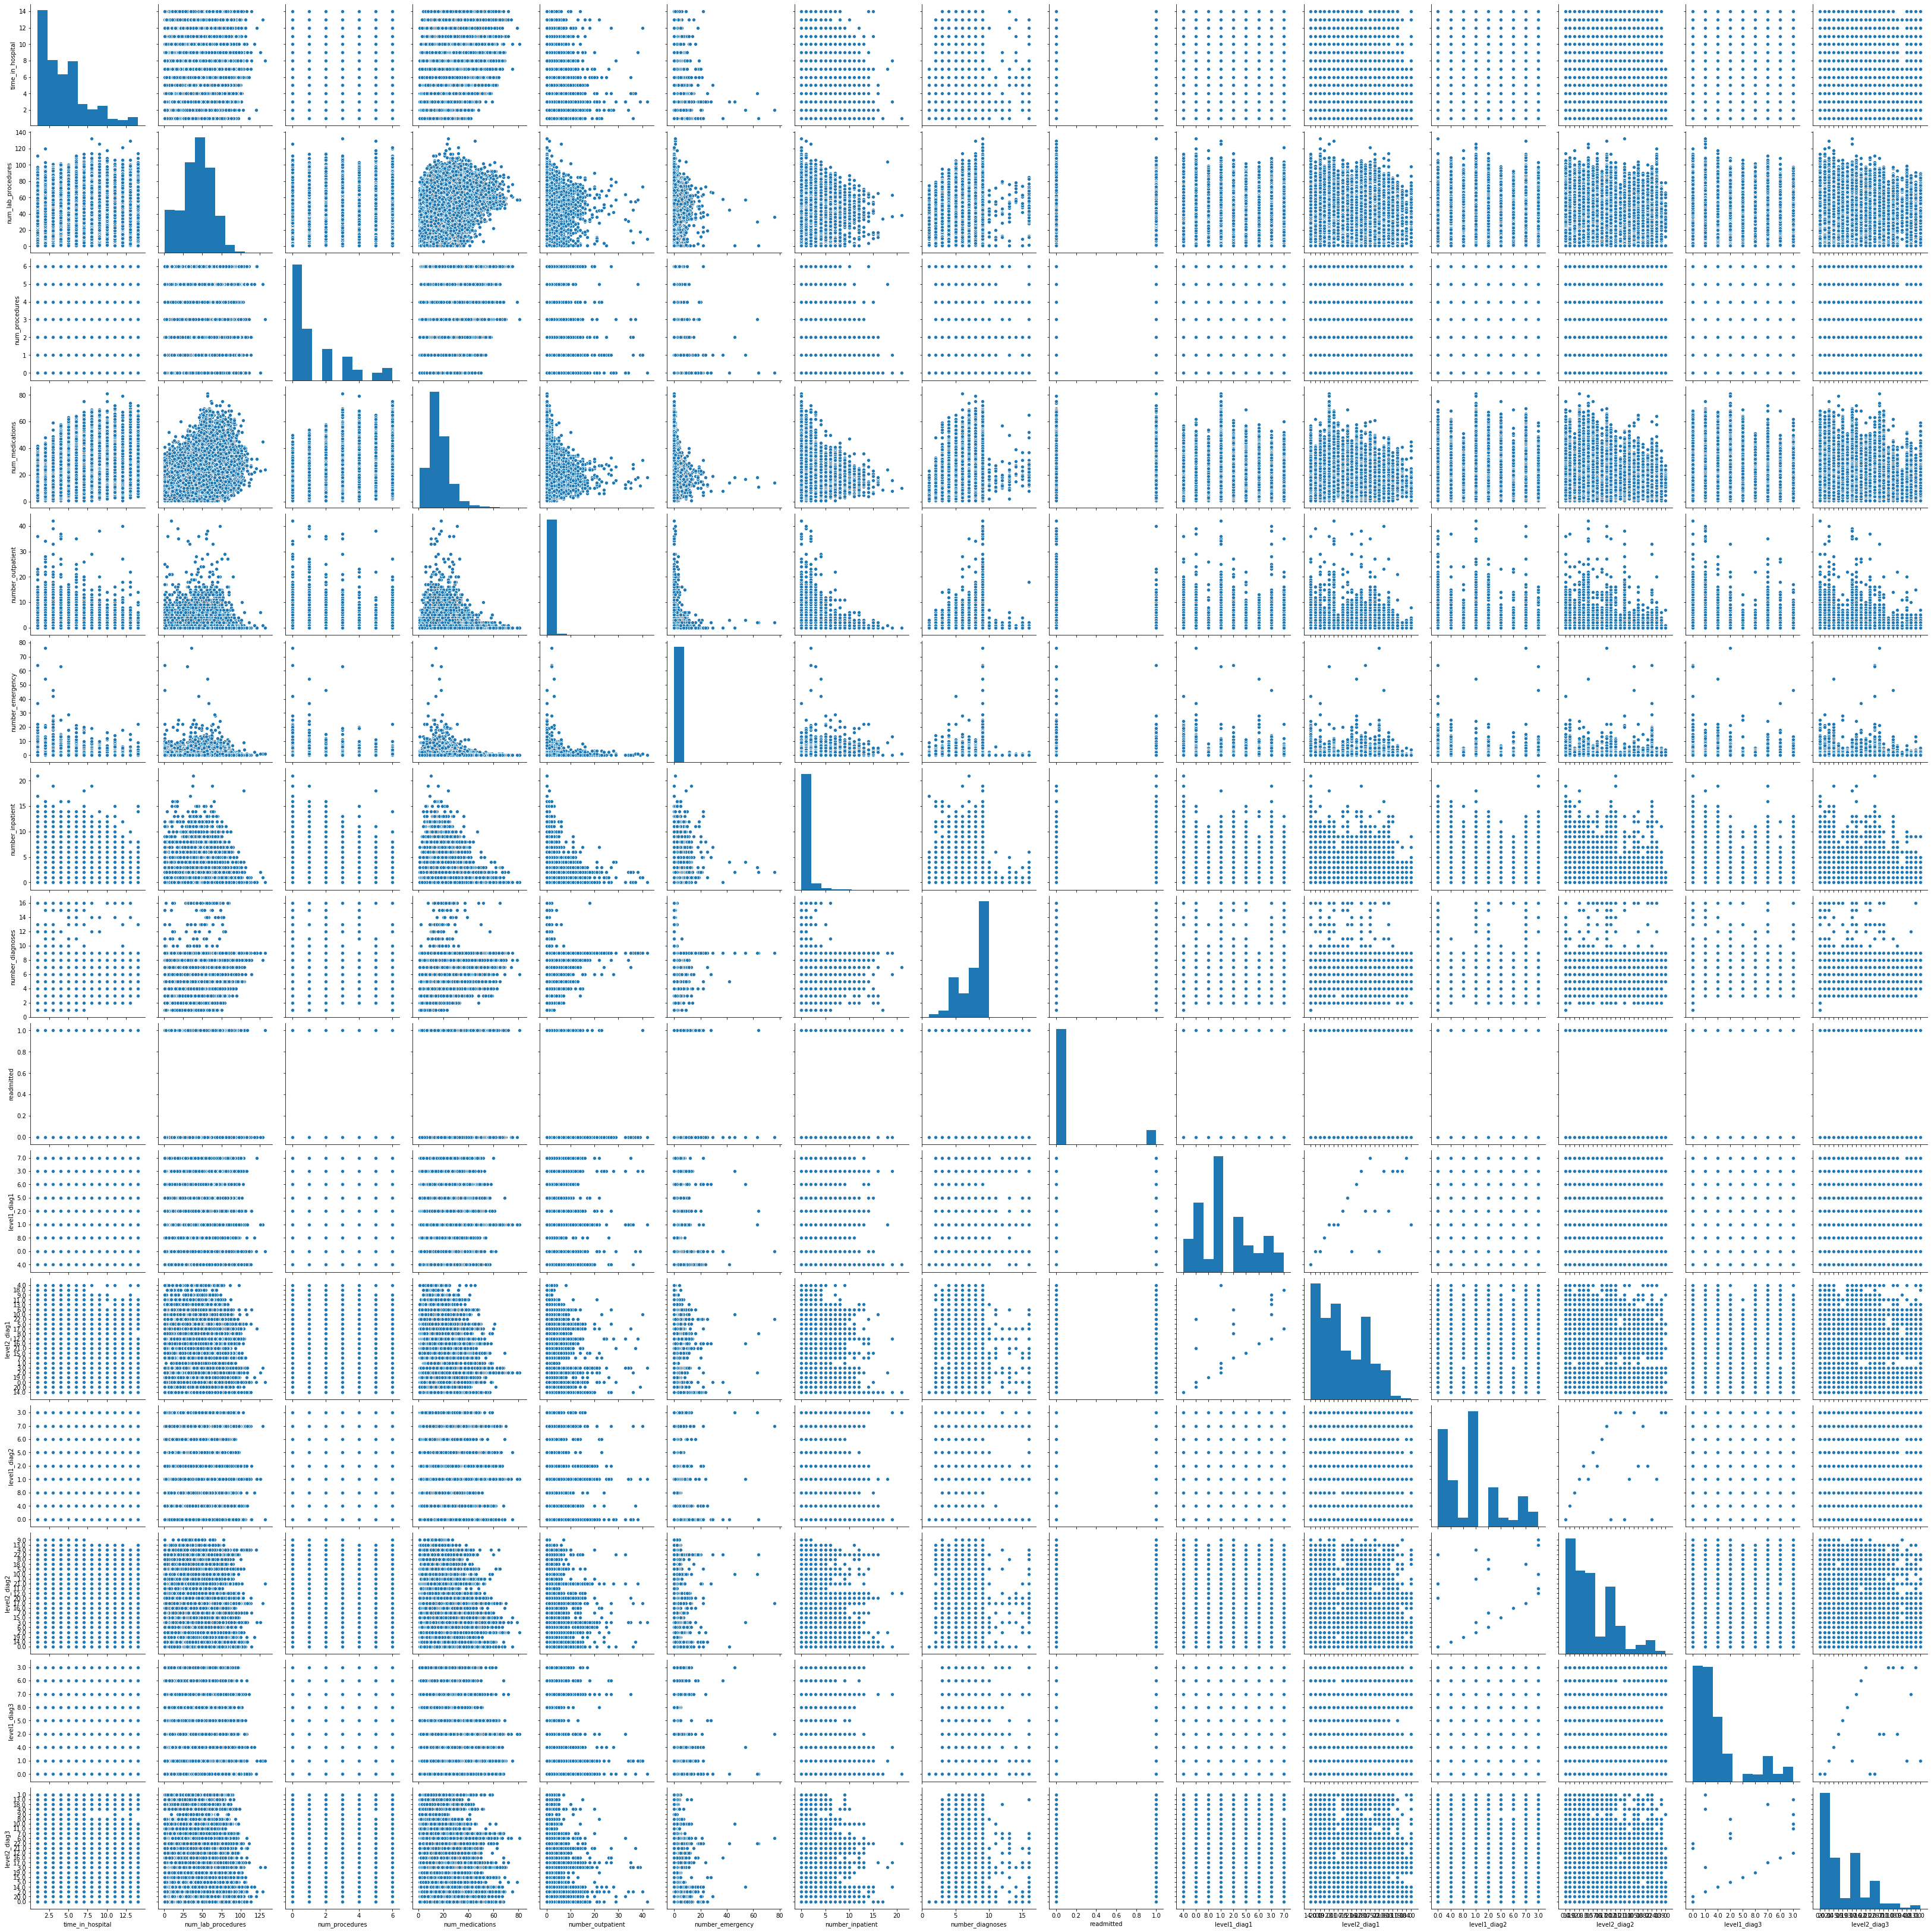

In [121]:
sns.pairplot(df,height=3) # scatter matrix
plt.show()

In [128]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [129]:
df_dia = df[['level1_diag1', 'level2_diag1', 'level1_diag2', 'level2_diag2',
       'level1_diag3', 'level2_diag3']]

In [130]:
df_dia.head()

,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
0,4.0,14.0,0.0,0.0,0.0,0.0
1,0.0,20.0,4.0,14.0,0.0,20.0
2,0.0,0.0,4.0,14.0,0.0,0.0
3,0.0,0.0,4.0,14.0,1.0,2.0
4,8.0,19.0,8.0,19.0,4.0,14.0


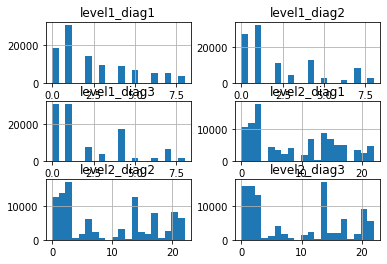

In [132]:
df_dia.hist(bins=20)
plt.show()

In [133]:
df_dia.corr()

,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
level1_diag1,1.000000,0.635326,0.070937,0.116358,0.048660,0.051606
level2_diag1,0.635326,1.000000,0.048636,0.187686,0.014656,0.085690
level1_diag2,0.070937,0.048636,1.000000,0.458780,0.025714,0.001540
level2_diag2,0.116358,0.187686,0.458780,1.000000,-0.019046,0.074237
level1_diag3,0.048660,0.014656,0.025714,-0.019046,1.000000,0.454435
level2_diag3,0.051606,0.085690,0.001540,0.074237,0.454435,1.000000


Text(0.5, 1.0, 'Age of Patient VS. Readmission')

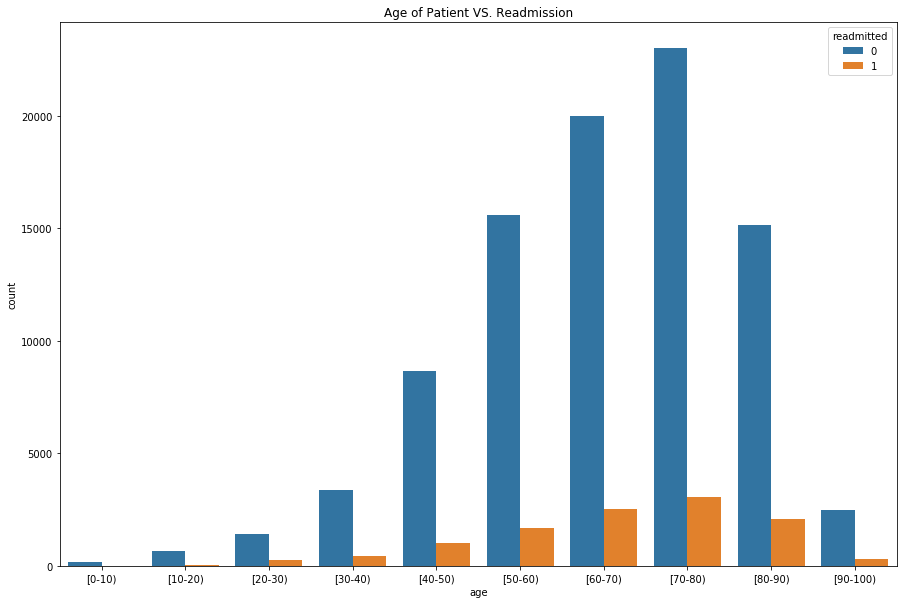

In [138]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

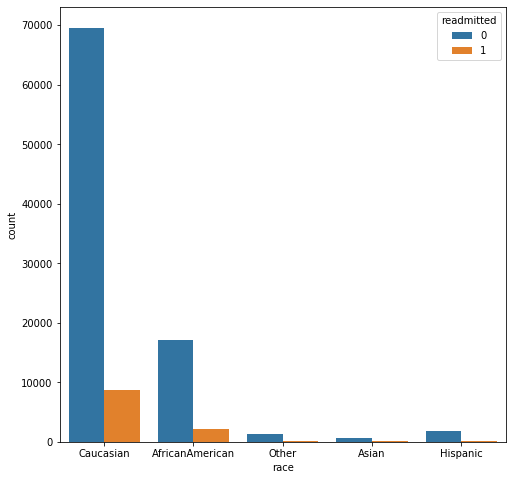

In [137]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = df['race'], hue = df['readmitted'])

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

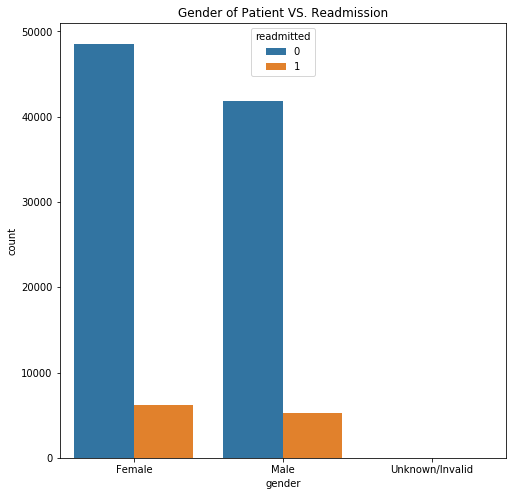

In [136]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS. Readmission")

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

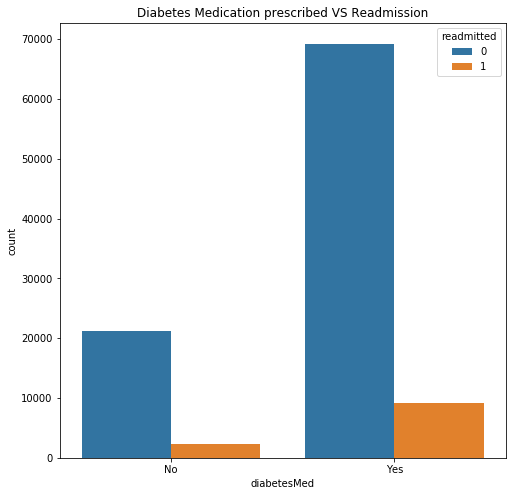

In [139]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['diabetesMed'], hue = df['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')